# Lab 14 Solution              

Proving that the SNe data is consistent with the BenchMark Cosmology.


Before we get started, let's execute the following cell which is almost always needed for our notebooks:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.constants import c

# Importing the solutions from Lab 12-14
from Lab13_Soln import CosmologicalTools

In [2]:

# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc


In [3]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck

In [4]:
# Initialize 
BenchMark = CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)
EinsteinDeSitter = CosmologicalTools(OmegaMD,OmegaRD,OmegaLD,h_planck)



In this exercise we will use data from the Supernova Cosmology project, one of the two teams which first found that the expansion rate of the Universe is accelerating in 1999. A simple introduction to the methods and findings of the SCP group can be found at https://newscenter.lbl.gov/2009/10/27/evolving-dark-energy/. The original paper is Perlmutter *et al.* 1999, "Measurement of $\Omega$ and $\Lambda$ from 42 High Redshift Supernovae", The Astrophysical Journal, Vol. 517, page 565.

The data set we will be using is a more recent sample, containing observations of 580 supernovae, known as the Union 2.1 sample from the paper Suzuki *et al*. 2012, "THE *HUBBLE SPACE TELESCOPE* CLUSTER SUPERNOVA SURVEY. V. IMPROVING THE DARK-ENERGY CONSTRAINTS ABOVE $z>1$ AND BUILDING AN EARLY-TYPE-HOSTED SUPERNOVA SAMPLE", The Astrophysical Journal, vol. 746, page 85.

The data are in the file SNeData.txt.

Take a look at the file using the `with` statement. 

One should always close files when finished using them.
The `with` statement makes this automatic.

Lets simply open the file and print out the first 10 lines to see how the file is formatted:

In [5]:
with open('SNeData.txt', 'r') as infile:
    for i in range(10):
        line = infile.readline()
        line = line.rstrip("\n")
        print(line)

# Supernova Cosmology Project Union2.1 Data
#  Suzuki et al. 
#Name z DistMod DistModErr ProbLowMassHost
1993ah 0.028488        35.3465833928 0.223905932998  0.128418942246
1993ag 0.050043        36.6823679154 0.166828851413  0.128418942246
1993o  0.052926        36.8176912545 0.1557559148    0.128418942246
1993b  0.070086        37.4467365424 0.158466934433  0.128418942246
1992bs 0.062668        37.4834093505 0.156099434739  0.128418942246
1992br 0.087589        38.2290570494 0.187745679272  0.128418942246
1992bp 0.078577        37.4881622607 0.155635656185  0.128418942246


The top of any good data file intended for sharing with others contains a "header" -- some lines at the top which describe the contents of the file.

Here we see that the file contains the SCP Union2.1 data, and that the columns are:

 * the name of the supernova
 * the redshift measured from its spectrum
 * its distance modulus
 * an estimate of the measurement error in the distance modulus
 * the probability the supernova occurred in a low-mass host galaxy
 


# Part A

The difference between the absolute magnitude $M$ and the apparent magnitude $m$, a number called the *distance modulus* which depends only upon the distance to the source

$$
\begin{split}
m-M &= - 2.5 \log_{10} \left(\frac{1}{F_0}\frac{L}{4\pi d^2}\right) + 2.5 \log_{10}\left(\frac{1}{F_0}\frac{L}{4\pi(10\ \textrm{pc})^2}\right)  \\
&= 5 \log_{10}\left(\frac{d}{10\ \textrm{pc}}\right)
\end{split}
$$
Because $M$ and $m$ are logarithmic functions, their difference is proportional to the *ratio* of the distance $d$ to 10 pc.

This is the distance measurement given in the data file for the distance to the supernovae. The measured LUMINOSITY distance is then

$$ d_L = 10^{(m-M)/5 +1} \textrm{pc} $$

In [6]:
def Distance_fromMod(mod):

    """ Function to compute the distance using the distance modulus
    PARAMETERS
    ----------
    mod: `float`
        distance modulus (apparent magnitude - absolute magnitude)

    OUTPUTS
    -------
    DL: `float`
        luminiosity distance in Mpc
    """
    
    a = (mod)/5 + 1
    DL = (10**a*u.pc).to(u.Mpc)
    
    return DL

In [7]:
# Read the file in and store the values using `npgenfromtxt`

data = np.genfromtxt('SNeData.txt',names=True,skip_header=2)

print(data['z'][0])
print(data['DistMod'][0])

0.028488
35.3465833928


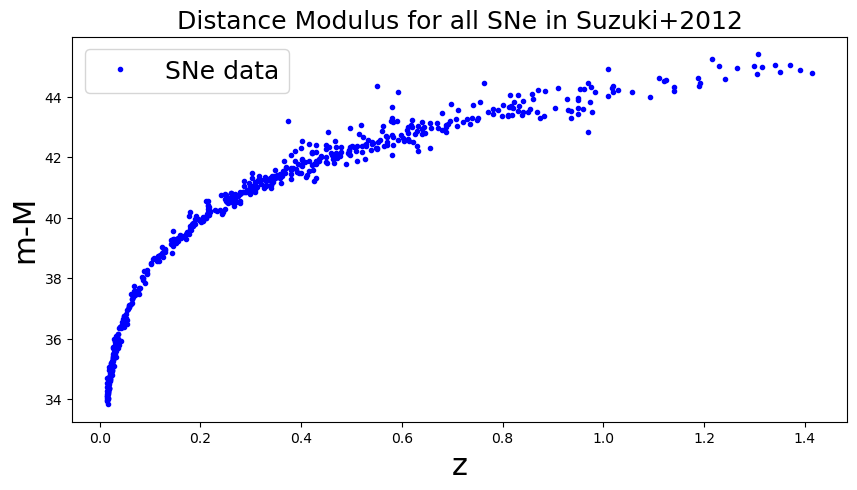

In [8]:
# Create a plot of Distance Modulus Vs. Redshift
# This is Figure 4 of Suzuki et al. 

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(data['z'],data['DistMod'],'b.', label='SNe data')
ax.set_xlabel('z', fontsize=22)
ax.set_ylabel('m-M', fontsize=22)
ax.set_title('Distance Modulus for all SNe in Suzuki+2012', fontsize=18)

legend = ax.legend(loc='upper left',fontsize=18)


# Part B

For each SNe in the data file compute: 

1) the luminosity distance, using from the distance modulus;

and

2) the recessional velocity in km/second, computed from the redshift using the relativistic doppler shift at low speeds, where v << c. 

$1+z = \frac{\lambda_{\rm obs}}{\lambda_{\rm e}}$

$z = \frac{\Delta \lambda}{\lambda_{\rm e}} = \frac{v}{c}$

In [9]:
#1) Distance
# Use Distance Modulus to determine the luminosity distance to each supernova

LD = Distance_fromMod(data['DistMod'])
print(LD[0])

117.30504178865594 Mpc


In [10]:
#2) Velocity
# Determine the recessional speed based on the redshift

In [11]:
# v = c *z  Relativistic Doppler Shift
# c, speed of light, is currently in m/s need it to be in km/s 
VR = data['z']*c.to(u.km/u.s) 

print(data['z'][0])
print(VR[0])

0.028488
8540.487543504 km / s


# Part C

Plot distance versus velocity just for the "nearby" supernovae, those within 200 Mpc of Earth. We can select the set of indices of the nearby supernovae using the `numpy.where` function

In [12]:
# Create an index for the nearby supernovae
near = np.where(LD.value < 200)

In [13]:
# get the number of nearby supernovae
nNear = len(near[0])
print(nNear)

135


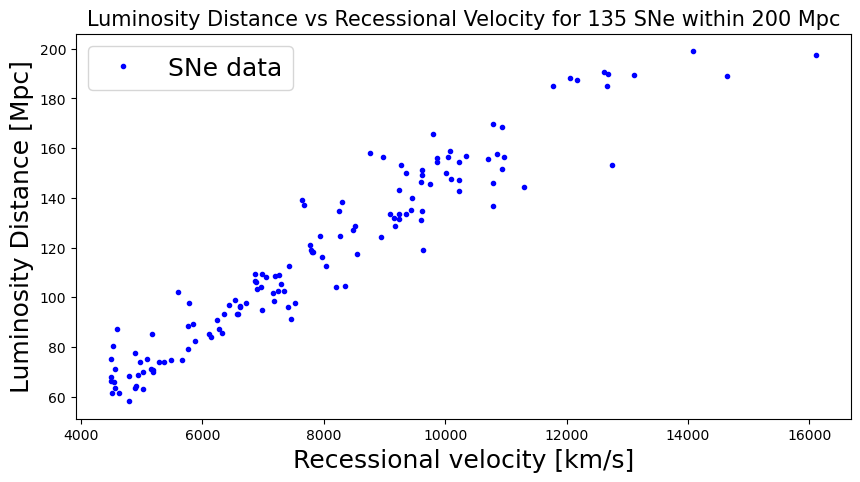

In [14]:
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(VR[near],LD[near],'b.', label='SNe data') # plotting nearby SNe

ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)

legend = ax.legend(loc='upper left',fontsize=18)


# Part D

Add a linear model atop the data, using Hubble's Law

 V = Hubble Parameter today * Comoving Radial Distance = H$_o$ D$_c$

In [15]:
# Create a linear model

# V = H*D (Hubble Parameter * Distance) 
# --> Distance = V/ H 
modelLD = VR/BenchMark.Ho

# 1/Ho ~ Age of the universe 
# this line is equivalently = t_age * VR[near] --> constant expansion over time.



In [19]:
slope, intercept = np.polyfit(VR[near].value,LD[near].value, deg=1)
bestfit = VR[near].value*slope + intercept
print(slope,intercept)
# or with curve fit 


# From stack overflow: 


# from scipy.optimize import curve_fit

# def f(x, A, B): # this is your 'straight line' y=f(x)
 #    return A*x + B

# popt, pcov = curve_fit(f, x, y) # your data x, y to fit
# where popt[0], popt[1] would be the slope and intercept of the straight line.



0.014060141534374033 4.9769398186004015


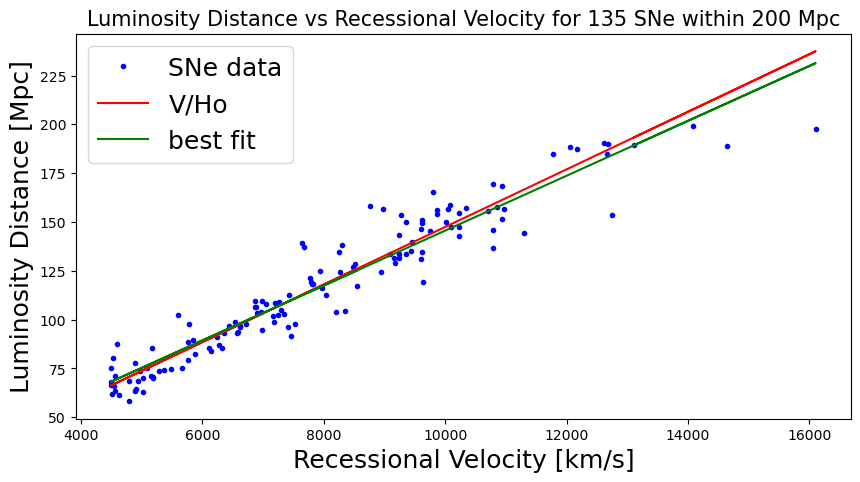

In [17]:
# Add the linear model to the figure of the nearest SNe
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(VR[near],LD[near],'b.', label='SNe data') # nearby SNe

ax.set_xlabel('Recessional Velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]',fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)

# add the model
ax.plot(VR[near], modelLD[near],'r',label='V/Ho' )

# best fit example
ax.plot(VR[near], bestfit,'g',label='best fit' )


legend = ax.legend(loc='upper left',fontsize=18)


# Part E
Let's now try plotting the whole dataset, which extends to distances far beyond what Hubble could have measured in his day

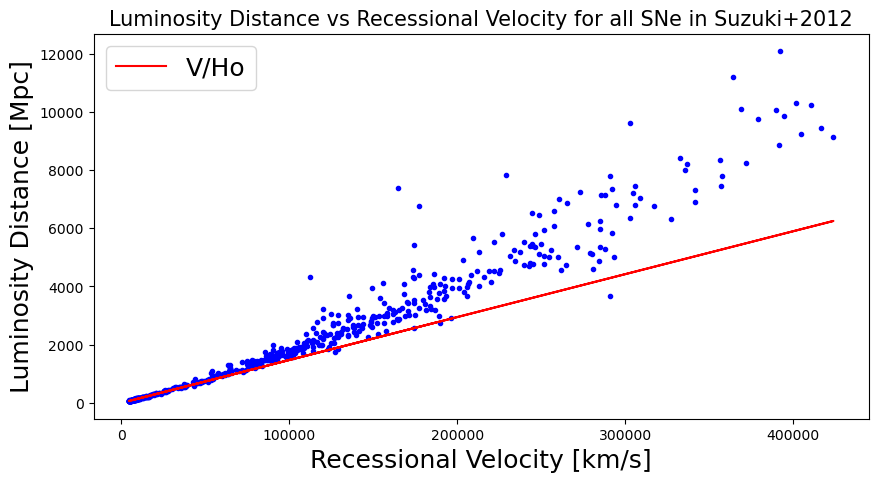

In [17]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(VR,LD,'b.') # all SNe

ax.set_xlabel('Recessional Velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for all SNe in Suzuki+2012",
             fontsize=15)
ax.plot(VR, modelLD,'r', label='V/Ho') # Model
legend = ax.legend(loc='upper left',fontsize=18)



The distant supernovae are moving more slowly than a constant Ho would predict...

 note that you could import `LambdaCDM` object from `astropy.cosmology` (CDM is "cold dark matter")

`from astropy.cosmology import LambdaCDM`

But instead we're going to use our own code ! 

# Part F

Instead of assuming a linear model, let's use our code to compute a model for the luminosity distance to objects moving with the Hubble flow. 

In [18]:
# modelLD assumed a linear expansion v * t_age of the universe
# but we can use the LuminosityDistance equation to recover the
# needed distance to these supernovae in an LCDM model
# the distnace we want is the one that we would get out 
# from the distance modulus

# Luminosity Distance: how far an object of known
#luminosity L would have to be in Euclidean space 
# so that we measure a total flux F.


In [19]:
# define an array of redshifts to compute the luminosity distance
zarray = np.linspace(0.01,1.1*max(data['z']),100)

In [20]:
# Compute the corresponding recessional velocities
# using the doppler shift
# z = v/c
vrec = zarray*c.to(u.km/u.s)

In [21]:
# Generate models for the luminosity distance as a function of z 
# for Benchmark and Einstein De Sitter Cosmologies. 
# Use a list comprehension
modelLD_BenchMark = [BenchMark.LuminosityDistance(i).value for i in zarray]
modelLD_EDS = [EinsteinDeSitter.LuminosityDistance(i).value for i in zarray]

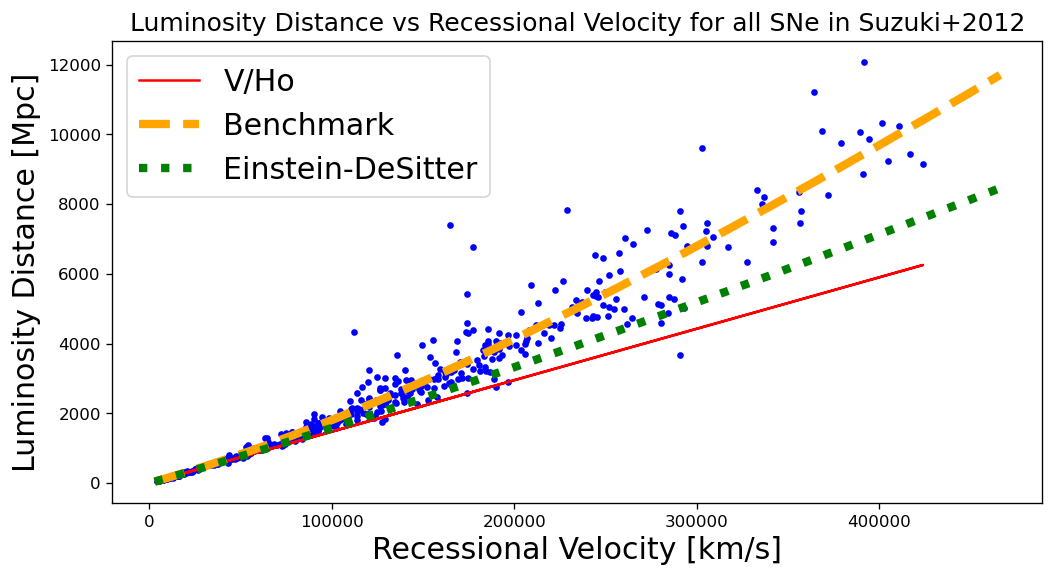

In [22]:
plt.rcParams["figure.dpi"] = 120

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(VR,LD,'b.') # all SNe

ax.set_xlabel('Recessional Velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for all SNe in Suzuki+2012",
             fontsize=15)

ax.plot(VR, modelLD,'r', label='V/Ho') # Model

# Benchmark Cosmology Luminosity Distance
ax.plot(vrec, modelLD_BenchMark,'orange', linestyle='--', lw=5, label='Benchmark')

# Einstein De Sitter Cosmology Luminosity Distance
ax.plot(vrec, modelLD_EDS,'green', linestyle=':', lw='5', label ='Einstein-DeSitter')

legend = ax.legend(loc='upper left',fontsize=18)

plt.savefig('Lab14_SNeCosmology.png')

# Part E
We can characterize how well the model fits the data by computing the  "$\chi^2$" of the model with respect to the data

$$ \chi = \sqrt{ \frac{\sum_i (\textrm{model}(z_i) - r_i)}{N-1} } $$

Let's write a function to do this:

In [23]:
def chi(model, data):
    """ Function to compute the deviation between a model and data 
            Chi = sqrt (Sum (deviation between model and data) / N-1)
    
    PARAMETERS
    ---------
    model: `np.darray`
        Array containing the model to be compared to the data
        
    data: `np.array`
        Array containing the data to be compared to the model
    
    OUTPUTS
    -------
    Chi: `float`
        Describes how well the model fits the data 
    
    """
    deviation = model - data
    N = len(data)
    Chi2 = np.sum(deviation**2)/(N-1)
    Chi = np.sqrt(Chi2)
    
    
    return Chi

The $\chi^2$ of our linear model is then

In [24]:
LinearChi = chi(modelLD.value, LD.value)
print(f"Linear chi = {LinearChi:5.1f}")

Linear chi = 1148.9


The $\chi^2$ of our Einstein-DeSitter Luminosity Distance model is then

In [25]:
modelLD_EDS = [EinsteinDeSitter.LuminosityDistance(i).value for i in data['z']]
EDSchi = chi(modelLD_EDS, LD.value)
print(f"EDS chi = {EDSchi:5.1f}")

EDS chi = 867.7


The $\chi^2$ of our BenchMark model is then

In [26]:
modelLD_BenchMark = [BenchMark.LuminosityDistance(i).value for i in data['z']]
BenchChi = chi(modelLD_BenchMark, LD.value)
print(f"BenchMark Chi = {BenchChi:5.1f}")

BenchMark Chi = 506.2


To test this more rigorously we could run through different values of Omega_M and Omega_L and generate probability contours (rather than $\chi^2$)

![title](scp2.1.png)

